### Task-1: Predicting House Prices Using Linear Regression


- Importing the necessary libraries

In [1]:
#for data preprocessing
import numpy as np
import pandas as pd


#for data visualisation:
import matplotlib.pyplot as plt
import seaborn as sns


#### Phase-1: Reading the dataset and Exploring the data


In [2]:
df = pd.read_csv('house-prices-advanced-regression-techniques\\train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
rows = 1460
cols = 81

print(f"The dataset contains: {rows} rows and {cols} columns")

The dataset contains: 1460 rows and 81 columns


**Performing descriptive statistical analysis**:

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Finding the percentage of Null values in the features:

nan_features = [feature for feature in df.columns if df[feature].isnull().sum() > 1]


for feature in nan_features:
    print(feature, np.round(df[feature].isnull().mean(), 4)*100,"% missing values")

LotFrontage 17.740000000000002 % missing values
Alley 93.77 % missing values
MasVnrType 0.5499999999999999 % missing values
MasVnrArea 0.5499999999999999 % missing values
BsmtQual 2.53 % missing values
BsmtCond 2.53 % missing values
BsmtExposure 2.6 % missing values
BsmtFinType1 2.53 % missing values
BsmtFinType2 2.6 % missing values
FireplaceQu 47.260000000000005 % missing values
GarageType 5.55 % missing values
GarageYrBlt 5.55 % missing values
GarageFinish 5.55 % missing values
GarageQual 5.55 % missing values
GarageCond 5.55 % missing values
PoolQC 99.52 % missing values
Fence 80.75 % missing values
MiscFeature 96.3 % missing values


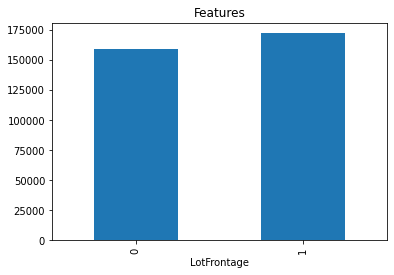

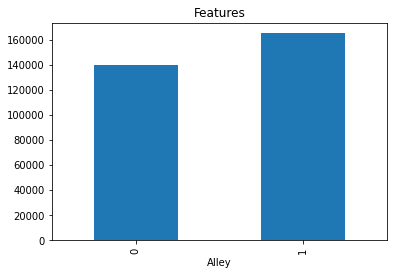

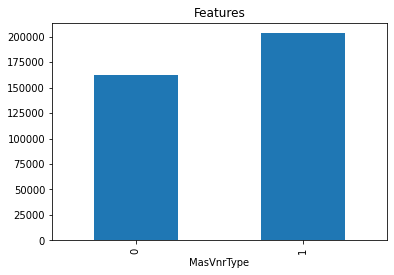

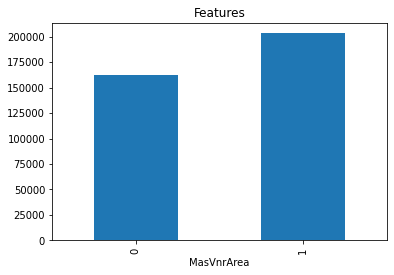

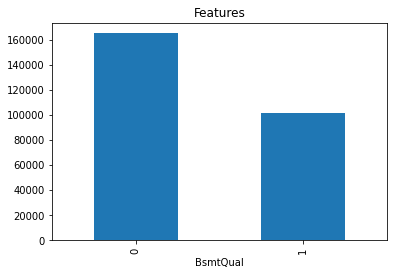

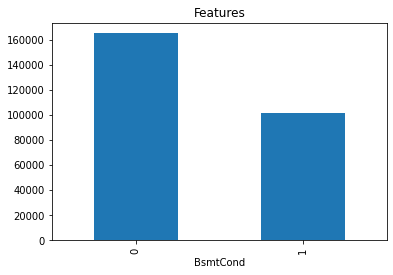

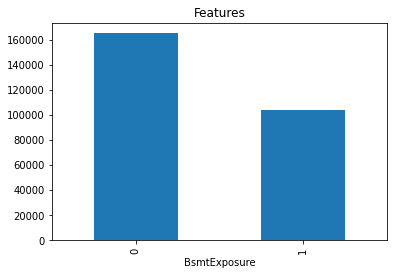

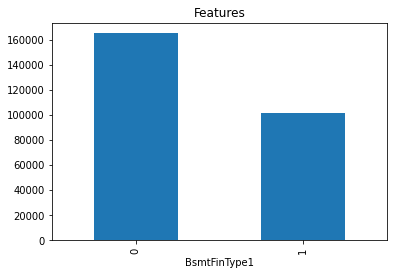

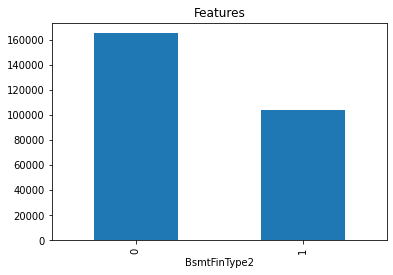

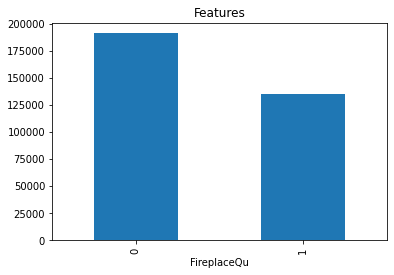

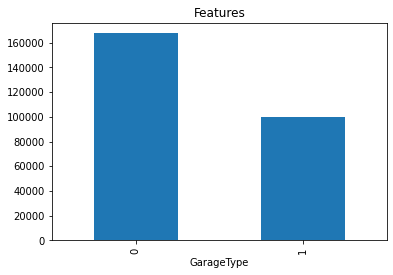

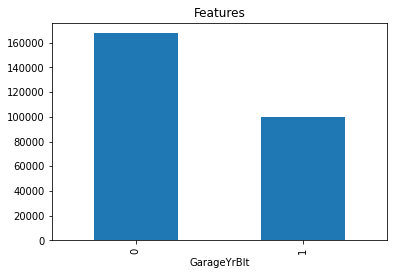

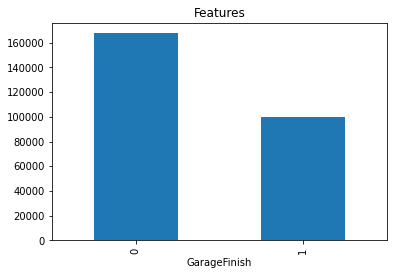

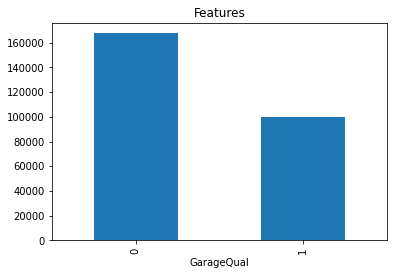

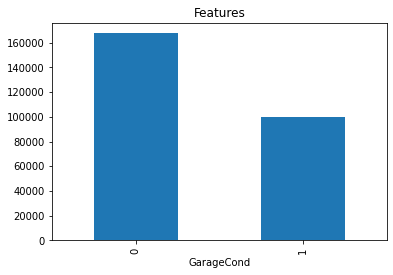

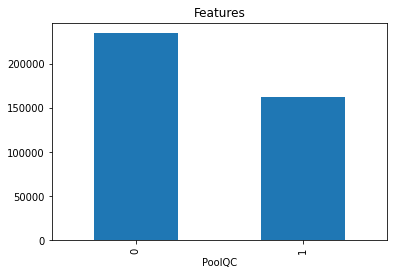

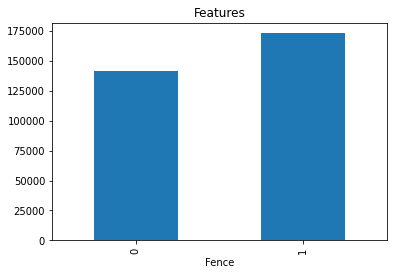

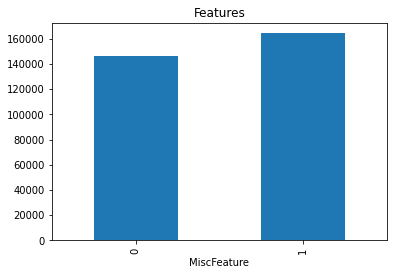

In [8]:
for feature in nan_features:
    data = df.copy() #creating a copy of data to preprocess the values

    #creating a variable which contains 1,0. 1 for every nan value
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    #Plotting the graphs for NaN value frequency
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title('Features')
    plt.show()

In [9]:
#Seperating the Numerical columns and Categorical Columns
numeric_feature = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Total Numerical features: ", len(numeric_feature))
df[numeric_feature].head(10)

Total Numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [10]:
#Categorical Columns

categorical_feature = df.select_dtypes(include='object').columns.tolist()
print("Total Categorical Features: ", len(categorical_feature))
df[categorical_feature].head(10)

Total Categorical Features:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
#Temporal Features(DateTime Features)

year_cols = [feature for feature in numeric_feature if 'Yr' in feature or 'Year' in feature]
print(year_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [12]:
#Finding out Unique values in the Temporal features

for feature in year_cols:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'SalePrice vs. YrSold')

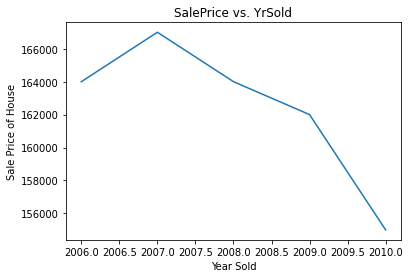

In [13]:
#Observing the relation between YearSold and SalePrice:

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price of House')
plt.title('SalePrice vs. YrSold')

- Insights<br>
  The relation shows price falls with time

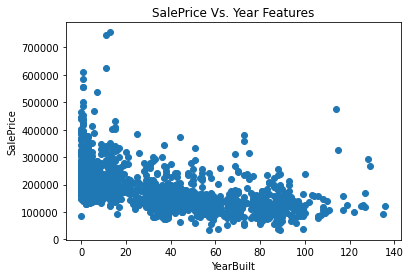

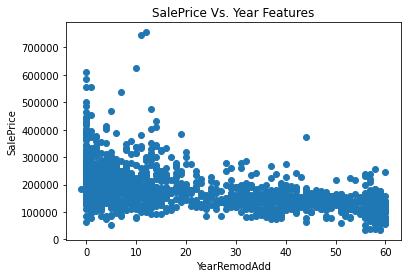

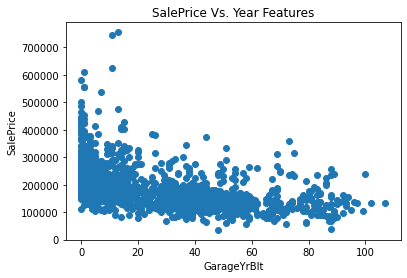

In [14]:
#Observing the relation between Year Features and SalePrice

for feature in year_cols:
    if feature!='YrSold':
        data = df.copy()

        #Calculating the difference between Year sold and the other year features:
        data[feature] = data['YrSold'] - data[feature]

        #Plotting the Scatter plots for the Sale Prices and the yearFeatures
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title("SalePrice Vs. Year Features")
        plt.show()

#### Analysing Numerical Features and Performing EDA:


In [15]:
#Selecting the discrete features:

discrete_feature = [feature for feature in numeric_feature if len(df[feature].unique())<25 and feature not in year_cols+['Id']]

#Total Number of Discrete Features:
print("Total count of Discrete Features:", len(discrete_feature))


Total count of Discrete Features: 17


In [16]:
df[discrete_feature].head(10)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
5,50,5,5,0,1,0,1,1,1,1,5,0,2,320,0,700,10
6,20,8,5,0,1,0,2,0,3,1,7,1,2,0,0,0,8
7,60,7,6,0,1,0,2,1,3,1,7,2,2,0,0,350,11
8,50,7,5,0,0,0,2,0,2,2,8,2,2,0,0,0,4
9,190,5,6,0,1,0,1,0,2,2,5,2,1,0,0,0,1


In [17]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

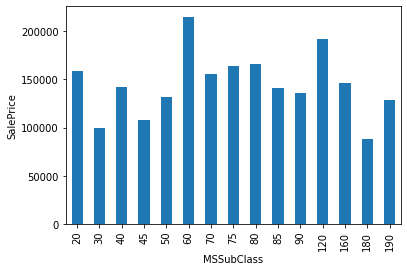

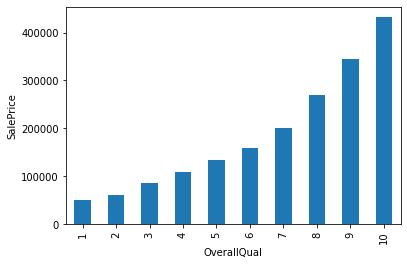

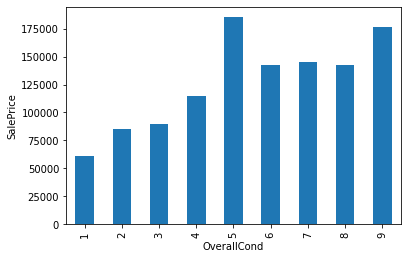

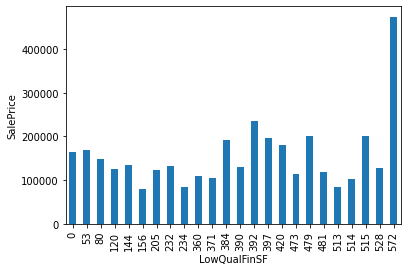

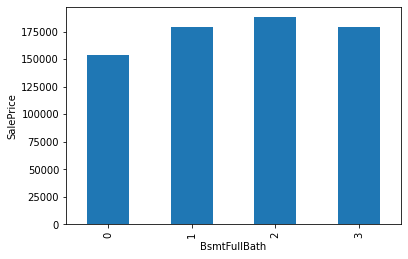

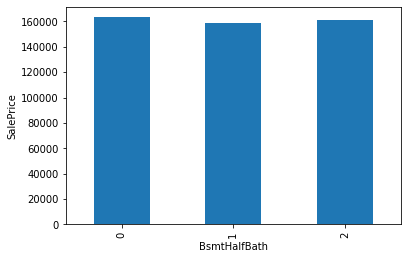

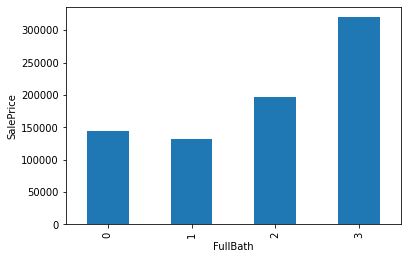

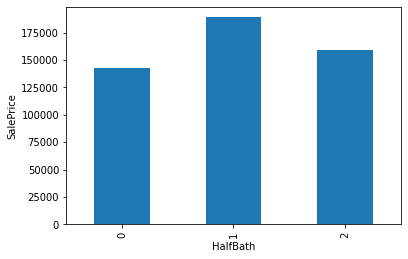

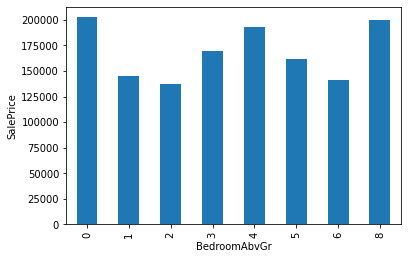

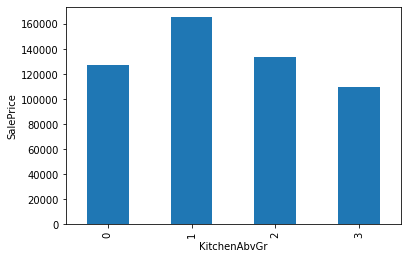

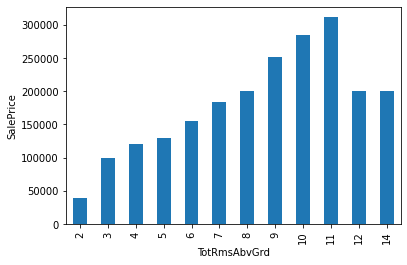

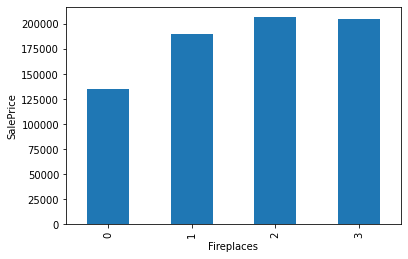

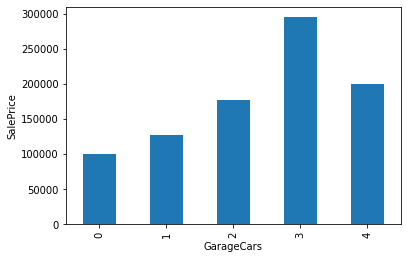

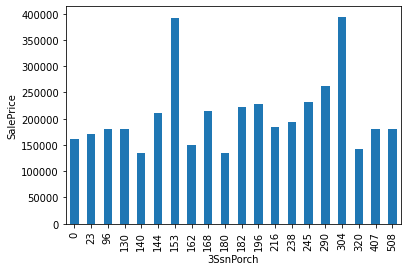

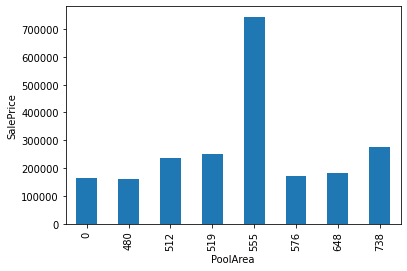

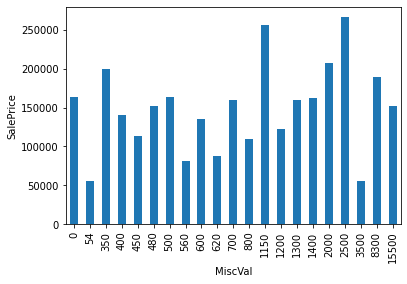

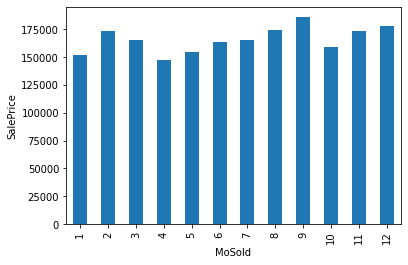

In [18]:
#Plotting the Relation betweeen the Discrete features and SalePrice


for feature in discrete_feature:
    data = df.copy()

    #Plotting bar graphs
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

**Insights**:<br>
- The relation between **OverallQuality and SalePrice** is exponential in nature<br>
- the other data do not follow a specific pattern

In [19]:
#Selecting Continous features:
cont_feature = [feature for feature in numeric_feature if feature not in discrete_feature+['Id']]
print("total number of continous features: ", len(cont_feature))


total number of continous features:  20


In [20]:
cont_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'SalePrice']

In [21]:
df[cont_feature].head(10)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,2008,250000
5,85.0,14115,1993,1995,0.0,732,0,64,796,796,566,1362,1993.0,480,40,30,0,0,2009,143000
6,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,0,1694,2004.0,636,255,57,0,0,2007,307000
7,NaN,10382,1973,1973,240.0,859,32,216,1107,1107,983,2090,1973.0,484,235,204,228,0,2009,200000
8,51.0,6120,1931,1950,0.0,0,0,952,952,1022,752,1774,1931.0,468,90,0,205,0,2008,129900
9,50.0,7420,1939,1950,0.0,851,0,140,991,1077,0,1077,1939.0,205,0,4,0,0,2008,118000


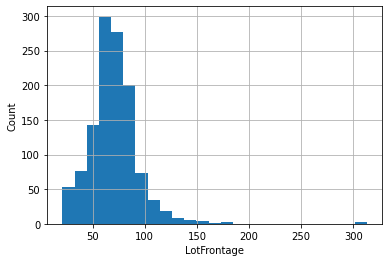

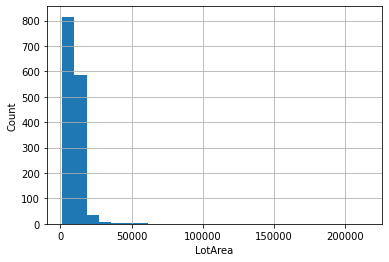

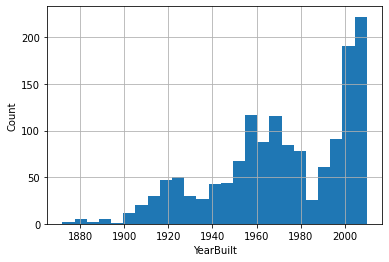

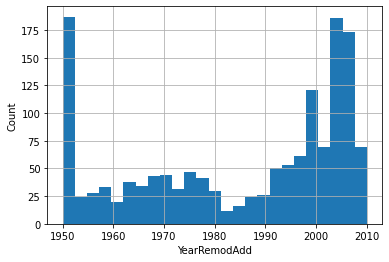

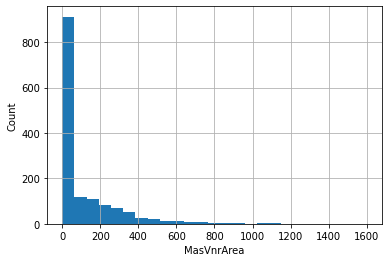

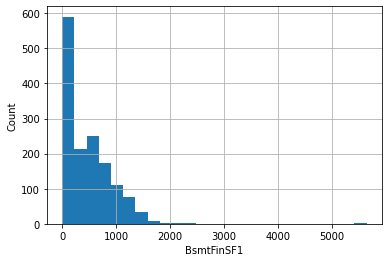

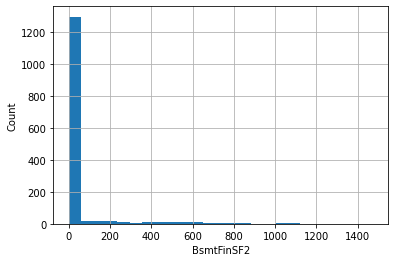

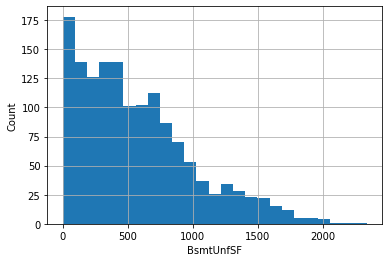

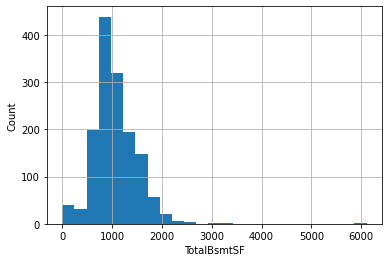

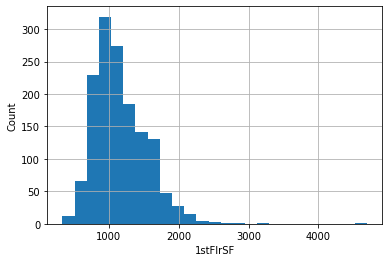

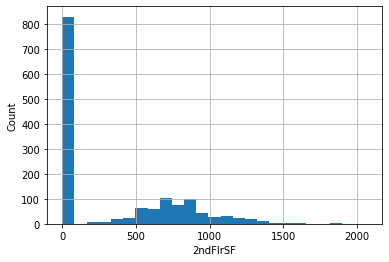

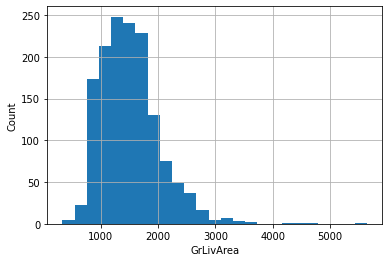

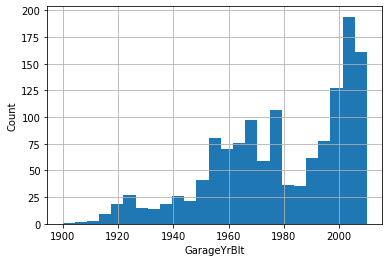

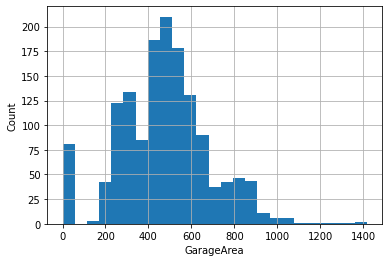

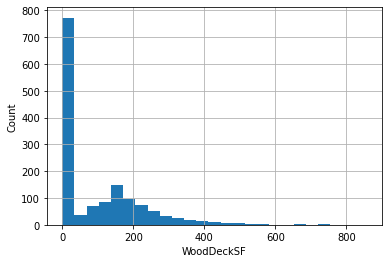

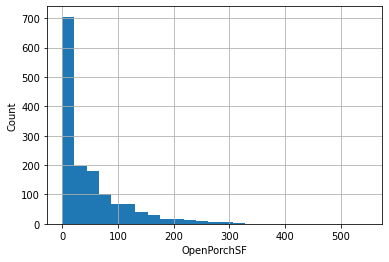

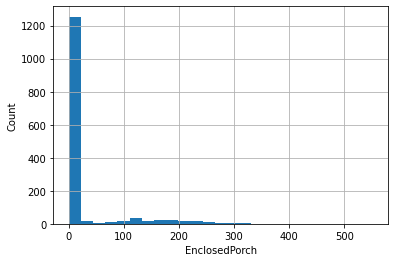

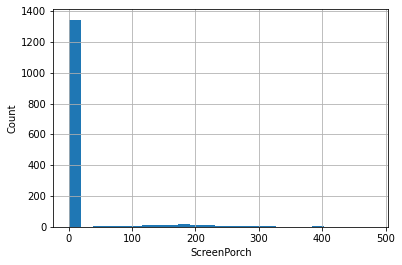

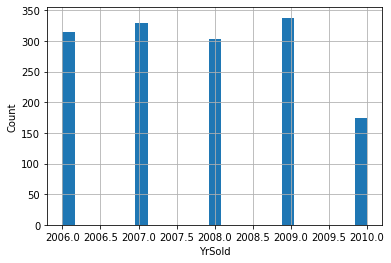

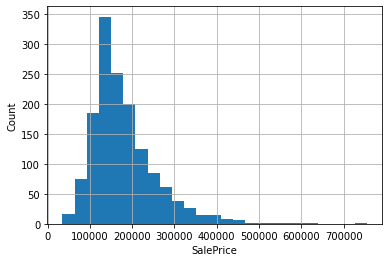

In [22]:
#Exploring the continous features and their count values

for feature in cont_feature:
    data = df.copy()

    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**Insights**:<br>
- The continous features resembles Gaussian/Normal Distribution to some extent but not fully,<br>
- Thus we have to normalize the data to the Gaussian form(using logarithmic transformation)

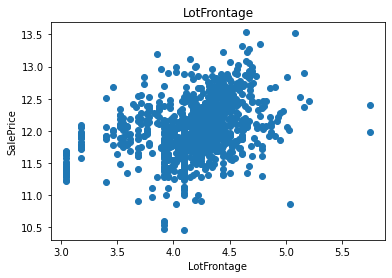

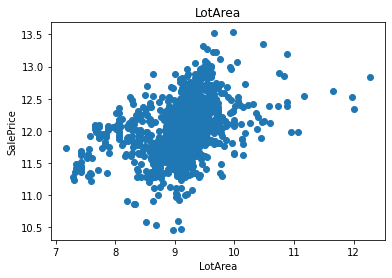

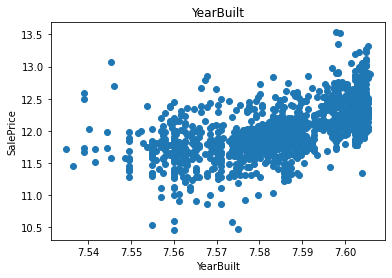

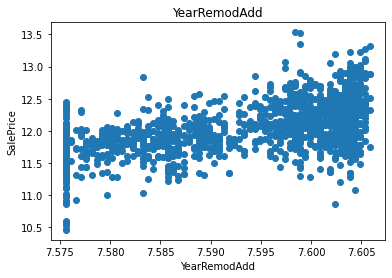

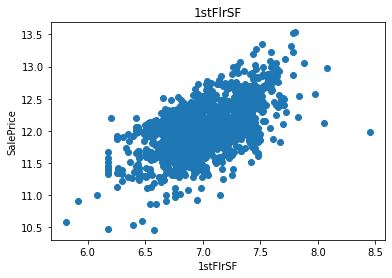

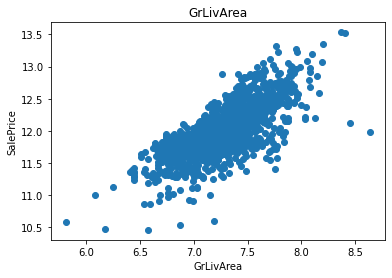

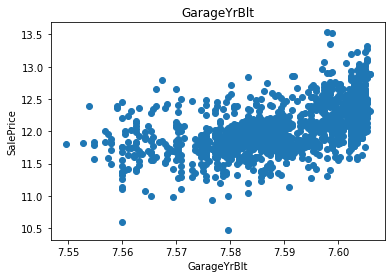

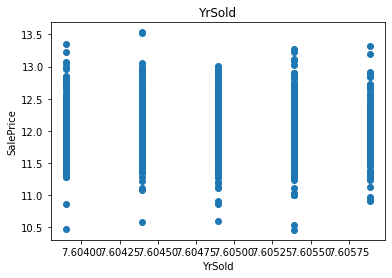

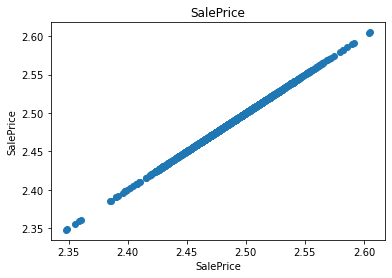

In [23]:
for feature in cont_feature:
    data = df.copy()

    if 0 in data[feature].unique():
        pass
     #this step is done to ensure we dont fall into log(0) condition, as log(0)=undefined

    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])


        #Plotting Scatter plots for the transformed columns
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()


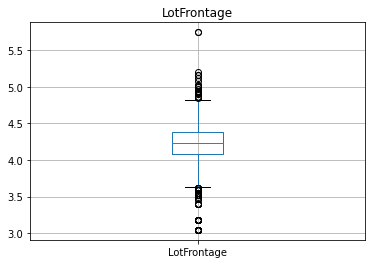

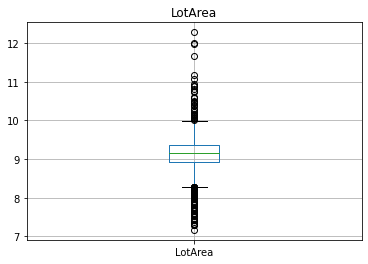

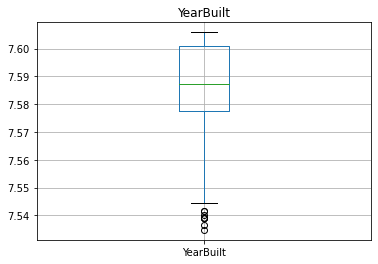

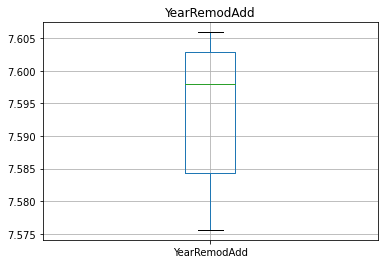

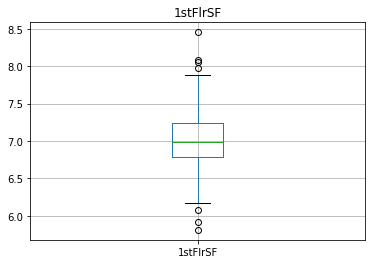

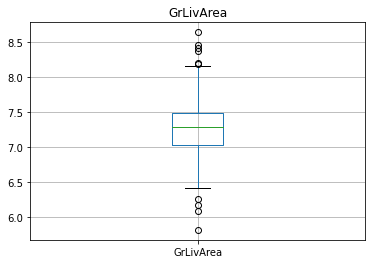

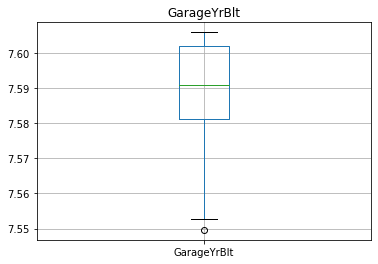

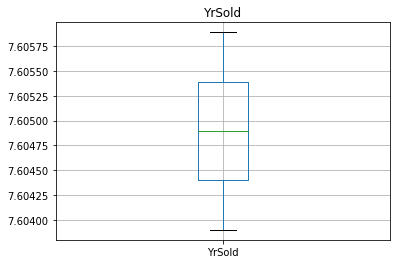

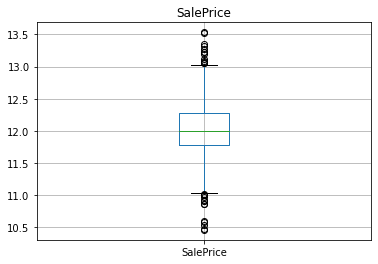

In [24]:
#Finding the Outliers in our data:

for feature in cont_feature:
    data = df.copy()

    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])

        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()

### Preprocessing the Categorical Features:


In [25]:
print('total number of catgorical features: ', len(categorical_feature))

total number of catgorical features:  43


In [26]:
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
#Calculating the cardinality of the features:

for feature in categorical_feature:
    print(f"The feature name: {feature}; Number of Unique values: {len(df[feature].unique())}")

The feature name: MSZoning; Number of Unique values: 5
The feature name: Street; Number of Unique values: 2
The feature name: Alley; Number of Unique values: 3
The feature name: LotShape; Number of Unique values: 4
The feature name: LandContour; Number of Unique values: 4
The feature name: Utilities; Number of Unique values: 2
The feature name: LotConfig; Number of Unique values: 5
The feature name: LandSlope; Number of Unique values: 3
The feature name: Neighborhood; Number of Unique values: 25
The feature name: Condition1; Number of Unique values: 9
The feature name: Condition2; Number of Unique values: 8
The feature name: BldgType; Number of Unique values: 5
The feature name: HouseStyle; Number of Unique values: 8
The feature name: RoofStyle; Number of Unique values: 6
The feature name: RoofMatl; Number of Unique values: 8
The feature name: Exterior1st; Number of Unique values: 15
The feature name: Exterior2nd; Number of Unique values: 16
The feature name: MasVnrType; Number of Uniq

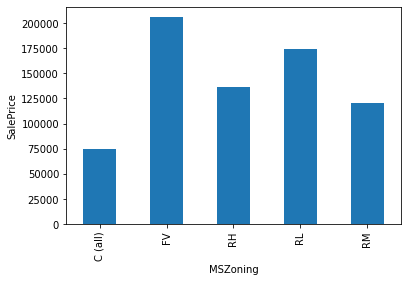

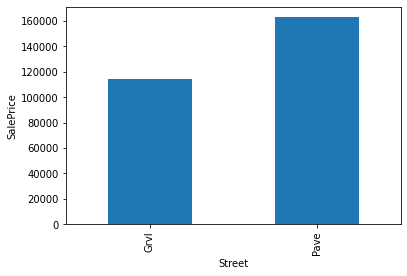

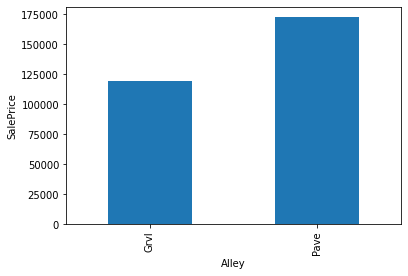

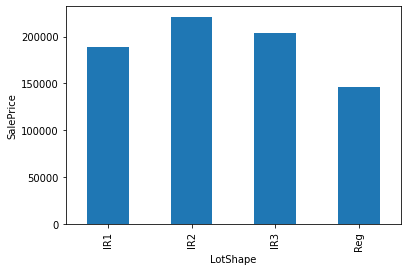

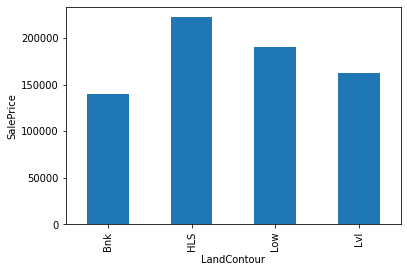

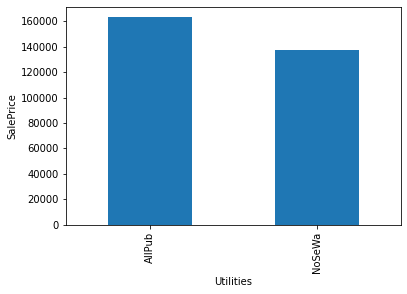

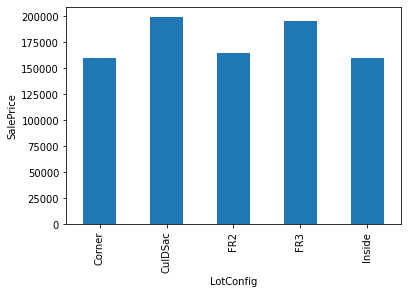

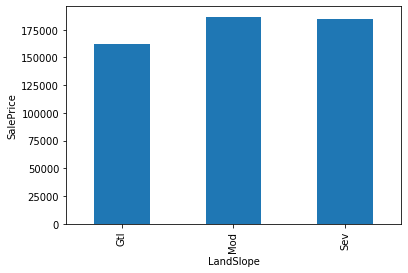

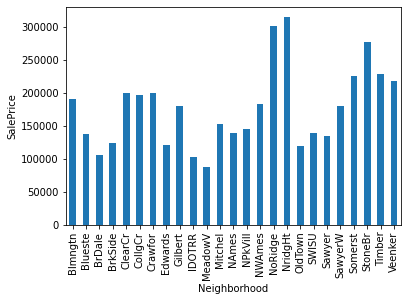

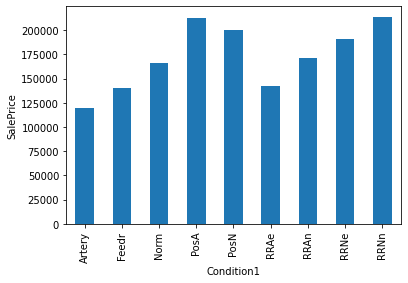

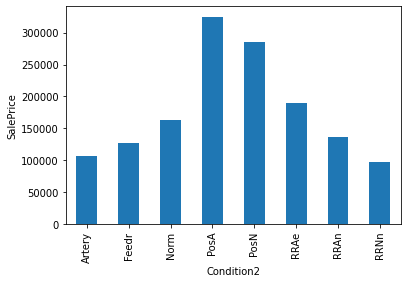

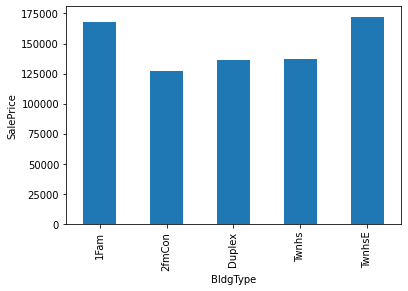

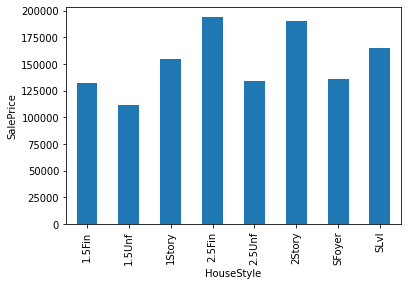

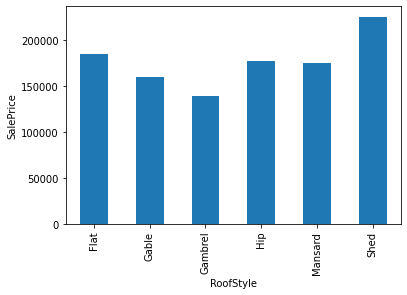

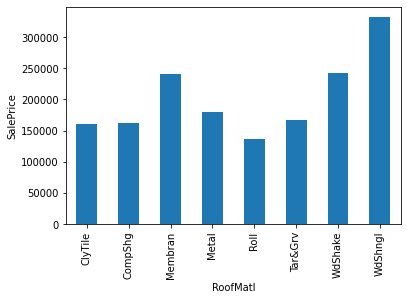

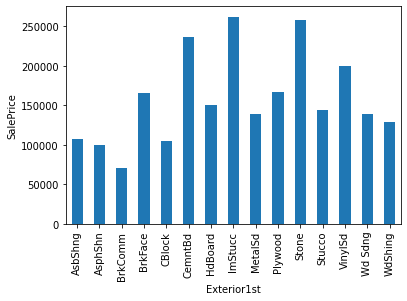

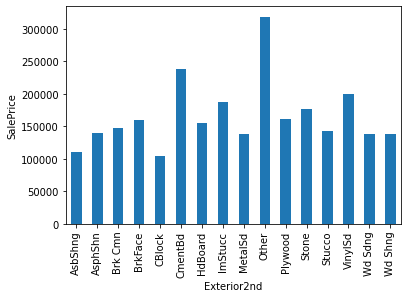

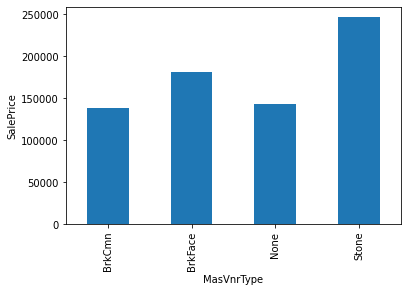

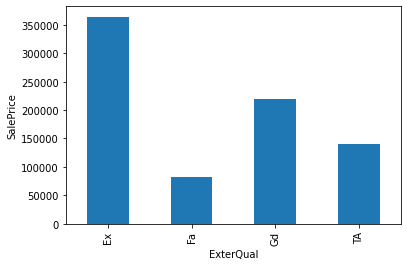

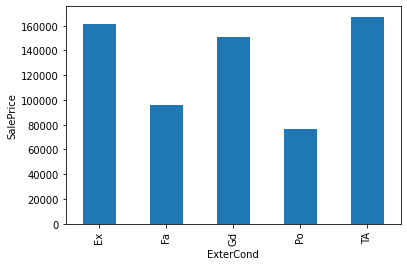

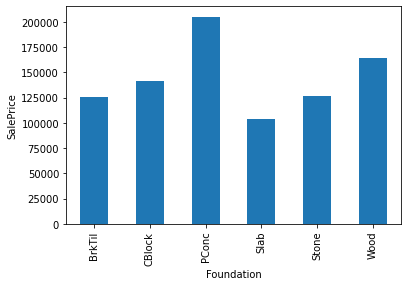

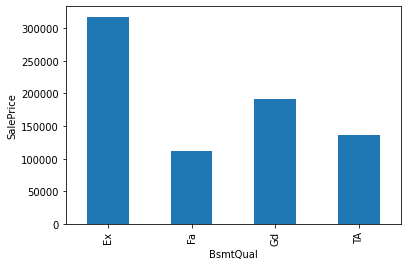

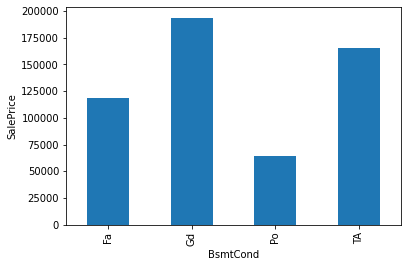

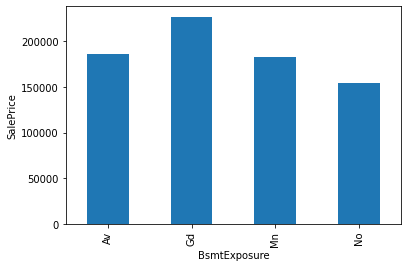

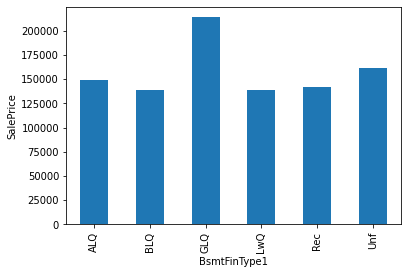

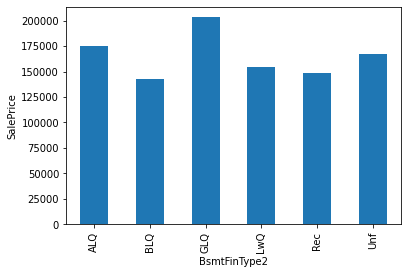

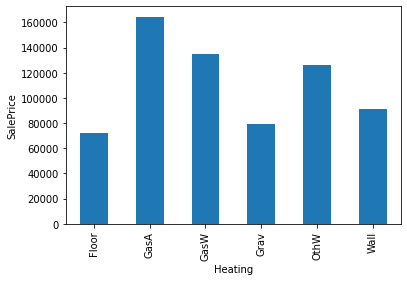

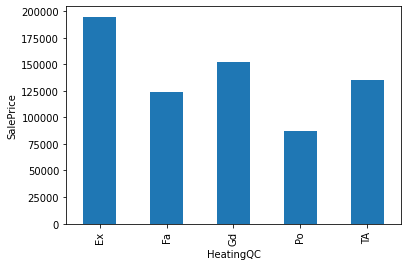

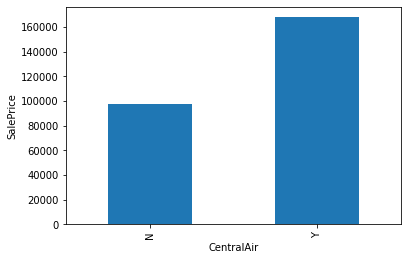

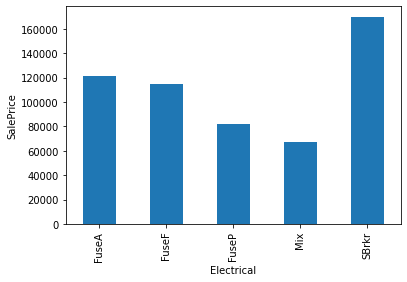

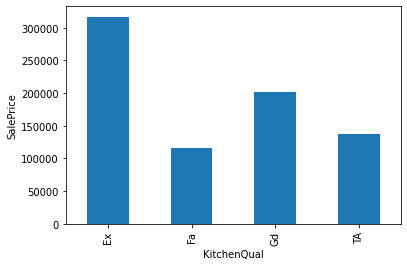

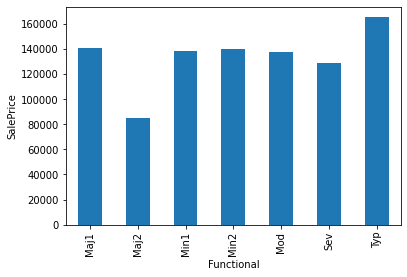

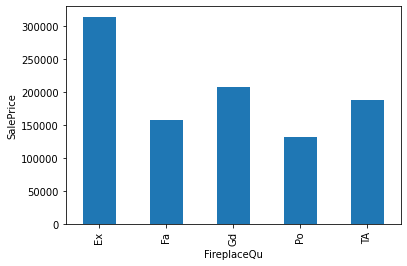

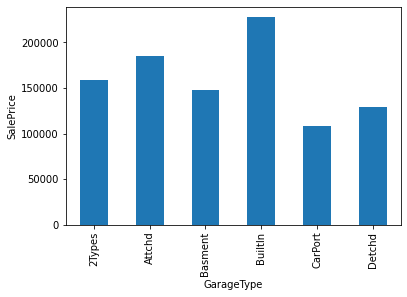

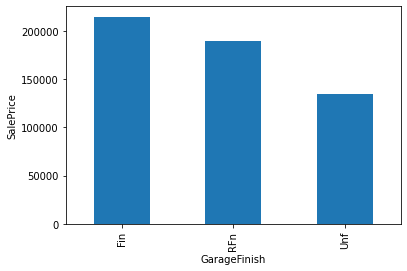

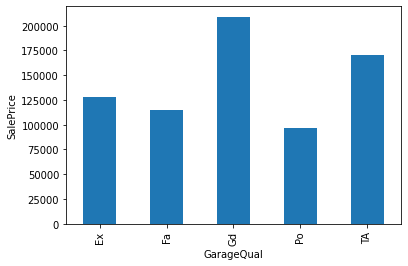

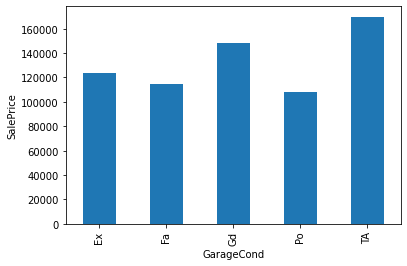

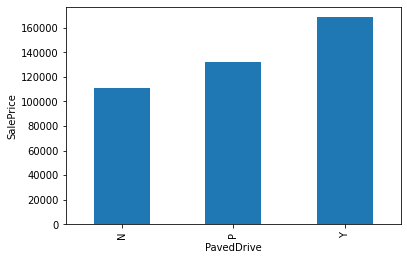

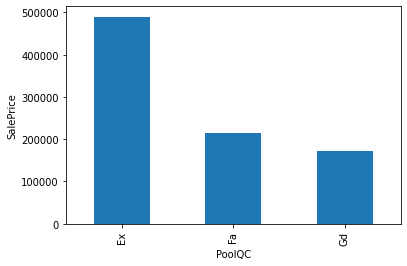

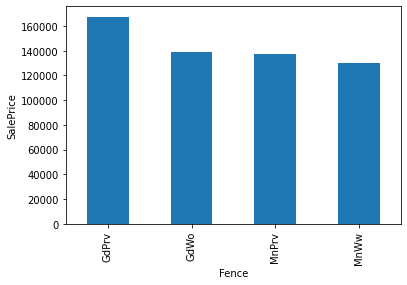

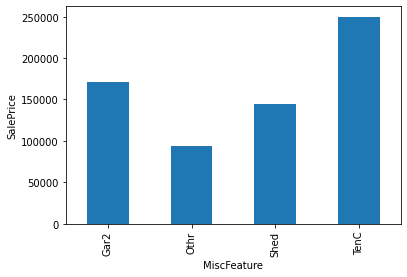

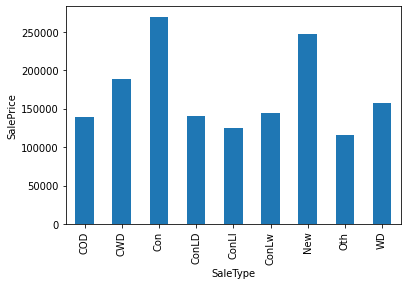

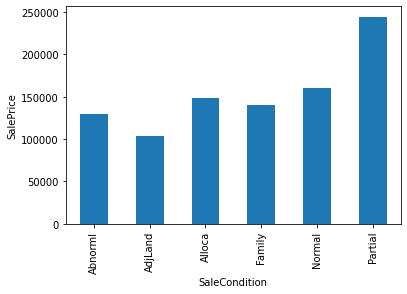

In [28]:
#observing the relation between categorical features and SalePrice:
for feature in categorical_feature:
    data = df.copy()

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

**____________________________________________________________**

### Phase 2: Data Preprocessing

**Insights after performing EDA**:<br>
- The Feature: 'Id' is redundant<br>
- Input cols: `MSSubClass` to `SaleCondition`<br>
- Output cols: `SalePrice`

In [29]:
#Selecting Input columns and Target columns:

inp_cols = list(df.columns)[1:-1]
target_col = 'SalePrice'



In [30]:
print(inp_cols)
print(target_col)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [31]:
input_df = df[inp_cols].copy()
target_df = df[target_col].copy()

In [32]:
input_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [33]:
target_df

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [34]:
df.info(max_cols=df.shape[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The target column has no missing values, hence we do not want to drop any columns or rows

In [35]:
numeric_feature.remove('Id')
numeric_feature.remove('SalePrice')

In [36]:
print(numeric_feature)
print(categorical_feature)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

### Preprocessing the data for the machine learning model

In [37]:
missing_values = input_df[numeric_feature].isna().sum().sort_values(ascending=False)
print(missing_values[missing_values>0])

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


**Insights**<br>
- The above 3 features contain missing values, so we will be using Imputation techniques for them<br>

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(input_df[numeric_feature])

SimpleImputer(strategy='median')

In [39]:
input_df[numeric_feature]=imputer.transform(input_df[numeric_feature])
input_df[numeric_feature].isna().sum().sort_values(ascending=False)

MSSubClass       0
LotFrontage      0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFinSF1       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

The missing values have been handled appropriately

- Now we have to Scale our features as our data has high variance which will decrease the performance of our machine learning model

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(input_df[numeric_feature])
input_df[numeric_feature]=scaler.transform(input_df[numeric_feature])


- The values of our dataset have been scaled down to the range of (0,1)

**Encoding The categorical Features Using OneHotEncoder**:

In [41]:
input_df[categorical_feature]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [42]:
#calculating the cardinality of the categorical values

input_df[categorical_feature].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(input_df[categorical_feature])

C:\Users\acer\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [44]:
encoded_cols = list(encoder.get_feature_names_out(categorical_feature))

In [45]:
print(encoded_cols)

['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'Alley_nan', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'N

In [46]:
input_df[encoded_cols] = encoder.transform(input_df[categorical_feature])

C:\Users\acer\AppData\Local\Temp\ipykernel_13900\669477617.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_feature])
C:\Users\acer\AppData\Local\Temp\ipykernel_13900\669477617.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_feature])
C:\Users\acer\AppData\Local\Temp\ipykernel_13900\669477617.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

In [47]:
input_df[encoded_cols]

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Splitting The dataset into Training, Validation and Testing Data**:

In [48]:
from sklearn.model_selection import train_test_split
train_inp, val_inp, train_target, val_target = train_test_split(input_df[numeric_feature+encoded_cols], 
                target_df, test_size=0.20, random_state=42)

In [49]:
train_inp

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,0.000000,0.167808,0.033186,0.444444,0.625,0.615942,0.116667,0.00000,0.163359,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,0.235294,0.130137,0.030555,0.555556,0.750,0.876812,0.733333,0.00000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,0.058824,0.157534,0.034948,0.444444,0.750,0.275362,0.000000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,0.176471,0.133562,0.027577,0.444444,0.750,0.471014,0.000000,0.15750,0.100815,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,0.176471,0.099315,0.017294,0.444444,0.625,0.376812,0.000000,0.00000,0.038625,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.195205,0.037472,0.555556,0.500,0.971014,0.933333,0.00000,0.004252,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,0.176471,0.150685,0.030400,0.333333,0.250,0.405797,0.000000,0.00000,0.110206,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,0.000000,0.133562,0.032120,0.444444,0.750,0.601449,0.666667,0.00000,0.029589,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.176471,0.116438,0.029643,0.666667,0.875,0.333333,0.800000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Phase-3: Model Training:<br>
- Creating a `LinearRegression` model using `Ridge`

In [50]:
import sklearn.utils._random
sklearn.utils._random.DEFAULT_SEED = 42

In [63]:
from sklearn.linear_model import Ridge

In [73]:
model = Ridge(alpha=0.001)
model.fit(train_inp, train_target)

Ridge(alpha=0.001)

**Evaluating the model performance by measuring its `MSE`**:


In [74]:
from sklearn.metrics import mean_squared_error

train_preds = model.predict(train_inp)

In [75]:
train_preds

array([146058.27611911, 170620.16013982,  93148.10097493, ...,
       117669.53073278, 162142.72119596, 191794.79584674])

In [76]:
train_mse = mean_squared_error(train_target, train_preds, squared=False)

In [77]:
print("The MSE on training set is: $", train_mse)

The MSE on training set is: $ 19083.198186348418


**Performance on Validation Set**:

In [78]:
val_preds = model.predict(val_inp)
print(val_preds)

[ 160972.00958072  348263.53841767   86890.13492585  179084.1752928
  318057.2357061    68864.84731388  238874.93635214  146153.24115866
   63083.45741956  152557.97552419  142171.07375989  103864.17821806
   78373.02353028  220302.90155136  172770.28774853  132981.37975391
  186301.9830183   126075.28914186  129914.62110899  215776.33777473
  146734.54381854  205893.75534469  173373.92318681  128711.04655225
  200314.52552552  139446.38188254  194340.18109825  103801.40826657
  175129.33681633  202013.39950724  156430.23723148  278481.9875284
  248132.57738554  107907.82397046  239605.64811421  149576.3022708
  131627.81241577  200305.76627038  308772.43937334  120418.42900076
  124212.20908074  222072.96663978  102458.63687045  372401.71443584
  131047.66657743  133234.67953829   95891.15197638  142918.39308443
  422822.66843879  131217.10929257  118899.67101122  250504.34125775
   98995.13617677  288811.98752648  162470.26062984  247411.89949099
  197500.5724287   165575.34433693  1

In [79]:
val_mse = mean_squared_error(val_target, val_preds, squared=False)


In [80]:
print("MSE on Validation set is $", val_mse)

MSE on Validation set is $ 35827.68717640867


In [60]:
weights = model.coef_


weight_df = pd.DataFrame(
    {
        'columns' : train_inp.columns,
        'weights': weights
    }
).sort_values('weights', ascending=False)

In [61]:
weight_df

,columns,weights
15,GrLivArea,77969.352022
275,PoolQC_Ex,77563.082679
12,1stFlrSF,64892.660744
3,OverallQual,62510.229716
13,2ndFlrSF,62429.277782
...,...,...
241,Functional_Sev,-20457.509013
21,KitchenAbvGr,-22593.156818
277,PoolQC_Gd,-75728.180728
102,Condition2_PosN,-92685.033337


## Creating a function to Predict over User Inputs:

In [85]:
def user_prediction(user_input):
    input_df = pd.DataFrame([user_input])
    input_df[numeric_feature] = imputer.transform(input_df[numeric_feature])
    input_df[numeric_feature] = scaler.transform(input_df[numeric_feature])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_feature].values)

    X_train = input_df[numeric_feature+encoded_cols]
    
    return model.predict(X_train)[0]

In [86]:
##Defining user Input:

import numpy as np

user_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [87]:
pred_price = user_prediction(user_input)

C:\Users\acer\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\acer\AppData\Local\Temp\ipykernel_13900\3959223013.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_feature].values)
C:\Users\acer\AppData\Local\Temp\ipykernel_13900\3959223013.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.

In [88]:
pred_price

122928.07111816667